### Reference :

_https://towardsdatascience.com/how-dis-similar-are-my-train-and-test-data-56af3923de9b_

Procedure to check if training and test datasets are same or not:

>First step is to divide the dataset into train (D_train) and test (D_test) sets.

>Label all the points of D_train dataset to '1' (positive) and all D_test dataset to '0' (negative), Lets say this new dataset id D_new

>Now train a classifer model for the above dataset and get the accuracy.

>If the accuracy on the above dataset 'D_new' is low, we can conclude that both train and test distributions are similar. It means that the trained model is not able to distinguish the datapoints belonging to different classes.milar to train data.

>If the accuracy of the model is medium, we can conclude that both train and test datasets are not very similar.

>If the accuracy of the model is high, we can conclude that both train and test dataset are not similar.

__Solution if both datasets are dissimilar:__

- Dropping of drifting features (If the feature importance of this feature is low).

- Importance weight using Density Ratio Estimation.

***
__Using Kolmogorov-Smirnov test to check if two random variables are having the same distribution or not__
***
_If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same._

_From wikipedia page :_

In statistics, the Kolmogorov–Smirnov test (K-S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous), one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). In essence, the test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?" or, in the second case, "What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?". It is named after Andrey Kolmogorov and Nikolai Smirnov.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous (see Section 2), purely discrete or mixed (see Section 2.2). In the two-sample case (see Section 3), the distribution considered under the null hypothesis is a continuous distribution but is otherwise unrestricted. However, the two sample test can also be performed under more general conditions that allow for discontinuity, heterogeneity and dependence across samples.[1] 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

dataset = load_diabetes(as_frame=True)
X,y = dataset['data'],dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

_Plotting the cumulative distribution function of ‘bp’ feature for both training and test datasets using seaborn:_

<AxesSubplot:xlabel='bp', ylabel='Proportion'>

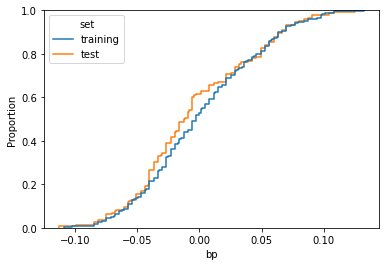

In [7]:
feature_name = 'bp'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

In order to quantify the difference between the two distributions with a single number, we can use Kolmogorov-Smirnov distance. Given C(x) the cumulative distribution of feature x in the training dataset and G(x) the cumulative distribution of the same feature in the test dataset, the distance is defined as the maximum distance between these curves.

The lower the distance, the more similar the distributions of the features among the training and test datasets.


In [8]:
ks_2samp(X_train.loc[:,feature_name],X_test.loc[:,feature_name]).statistic

0.11972417623102555

__We can calculate the distance between the two datasets as the maximum distance between their features.__

In [9]:
distances = list(map(lambda i : ks_2samp(X_train.iloc[:,i],X_test.iloc[:,i]).statistic,range(X_train.shape[1])))

In [11]:
for i in range(X_train.shape[1]):
  print(X_train.columns[i], distances[i])

age 0.05715475749722325
sex 0.054979637171417996
bmi 0.08015549796371714
bp 0.11972417623102555
s1 0.07284339133654202
s2 0.08908737504627916
s3 0.07936875231395779
s4 0.06613291373565346
s5 0.05858941132913736
s6 0.09667715660866345


As we can see, the feature that has the lower bias is ‘sex’, while the worst one is ‘bp’. The distance between the datasets is the worst distance, so 0.1197.

In [2]:
from scipy.stats import ks_2samp
import numpy as np
 
np.random.seed(12345678)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(1.1, 0.9, 1000)
 
ks_2samp(x, y)

KstestResult(statistic=0.023, pvalue=0.9542189106778983)

In [3]:
ks_2samp(x, z)

KstestResult(statistic=0.418, pvalue=1.2040448267583641e-78)